<a href="https://colab.research.google.com/github/Aldo23/image_analytics/blob/master/test_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
root = '/content/drive/My Drive/Colab Notebooks/ROMI'
import sys
sys.path.append(root)

Mounted at /content/drive/


In [2]:
!pip install imutils
!pip install align
!pip install mask-rcnn-12rics

In [3]:
# to make mask-rcnn compatible with tensor-flow 2
#/usr/local/lib/python3.6/dist-packages/mrcnn/model.py 
!tf_upgrade_v2 --intree /usr/local/lib/python3.6/dist-packages/mrcnn/  --outtree /usr/local/lib/python3.6/dist-packages/mrcnn/ \

TensorFlow 2.0 Upgrade Script
-----------------------------
Converted 6 files
Detected 0 issues that require attention
--------------------------------------------------------------------------------


Make sure to read the detailed log 'report.txt'



In [4]:
import os
import align
import crop
import detect
import assemble
import cv2
import imutils
import copy
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [0]:
class Scan:
    def __init__(self, name):
        self.name = name
        self.dir = '{0}{1}/{1}_aligned_ps.png'.format(folder, self.name)

    def pca_angle(self, filepath):
        self.pca_angle, self.diagonal = align.pca_angle(filepath)
        return self.pca_angle, self.diagonal

    def align(self, filepath, angle, diagonal):
        self.aligned = align.rotate_image(filepath, angle, diagonal)
        return self.aligned

    def crop(self, img):
        self.cropped = crop.crop(img)
        return self.cropped

    def detect(self, img):
        self.detected = detect.detect(img)
        return self.detected

    def find_marker(self, img):
        mask, self.cropped, self.img_scale = detect.find_marker(img)
        return mask, self.cropped, self.img_scale

    def assemble_points(self, points, ind_x, ind_y):
        self.plant_coordinates = assemble.assemble_points(points, ind_x, ind_y)
        return self.plant_coordinates

In [0]:
def is_date(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

In [7]:
folder = '{}/scans/'.format(root)
folder_ls = os.listdir(folder)
dates = []
for dir in folder_ls:
    if is_date(dir):
        dates.append(dir)
dates.sort()
data = {}
dates

['200305', '200310', '200315', '200320']

In [8]:
for date in dates:
    if date == '200305':
        plants = []
        a = Scan(date)
        # angle, diagonal = a.pca_angle(a.dir)
        # aligned = a.align(a.dir, angle, diagonal)
        aligned = cv2.imread(a.dir)
        height, width = aligned.shape[:2]
height, width

(2453, 9314)

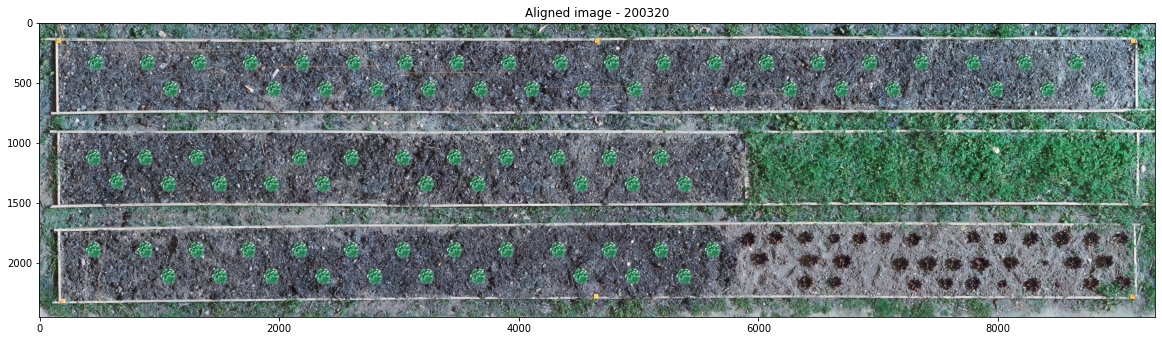

In [9]:
        plt.rcParams["figure.figsize"] = (20,8)
        plt.imshow(aligned)
        plt.title('Aligned image - {}'.format(date))
        plt.show()

In [10]:
        cropped = a.crop(aligned)
        plants_cor = np.zeros((1, 2), dtype=np.int32)
        total_detected = copy.copy(aligned)
        total_Mask_detected = cv2.cvtColor(total_detected, cv2.COLOR_BGR2GRAY)
        print(total_Mask_detected.shape)

(2453, 9314)


In [11]:
        t = 0
        scale = 0
        area = []
        for i in cropped:
            # #only runs the code for first cropped image, remove this "if" part to get the full detected image
            # if t < 2:
            #     t += 1
            cell_x = int(i.split(',')[0])
            cell_y = int(i.split(',')[1])
            img = cropped[i]
            mask, img, img_scale = a.find_marker(img)
            img, cell_points, count_detected, mask_dt = a.detect(img)
            print(mask_dt.shape)
            for j in count_detected:
                area.append(j)
            x = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            x_offset = img.shape[1] * cell_x
            y_offset = img.shape[0] * cell_y
            total_detected[y_offset:y_offset+img.shape[0],x_offset:x_offset+img.shape[1]] = img
            pts = a.assemble_points(cell_points, cell_x, cell_y)
            if len(pts) > 0:
                plants_cor = np.append(plants_cor, pts, axis=0)
            
            #conditional if mask is empty
            if mask_dt.size == 1:
              img_m = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
              mask_dt = np.zeros(img_m.shape)
              #mask_dt = cv2.cvtColor(mask_dt, cv2.COLOR_BGR2GRAY)
              print(mask_dt.shape)

            #assemble mask images
            total_Mask_detected[y_offset:y_offset+img.shape[0],x_offset:x_offset+img.shape[1]] = mask_dt*255

            # #visualization
            # plt.rcParams["figure.figsize"] = (20,8)
            # plt.title('Detected image')
            # #plt.imshow(x)
            # plt.imshow(mask_dt,cmap='gray')
            # plt.show()

        a.detected_masks = total_Mask_detected    
        a.detected_crop = total_detected

marker_area is: 1763.0
image scale is: 1.1908137705738524
Processing 1 images
image                    shape: (817, 1552, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1552.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
(817, 1552)
no marker found
Processing 1 images
image                    shape: (817, 1552, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1552.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
(817, 1552)
marker_area is: 646.0
image scale is: 1.9672236884115841
Processing 1 images
image                

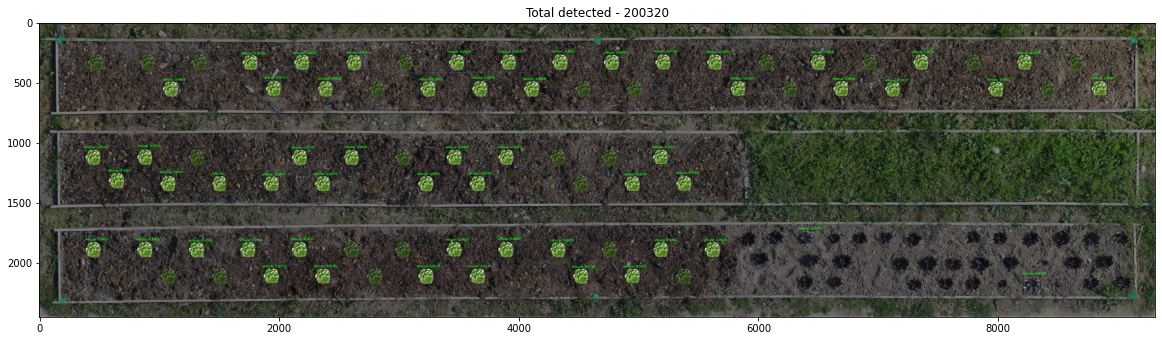

In [12]:
        a.detected_crop = cv2.cvtColor(a.detected_crop, cv2.COLOR_BGR2RGB)
        plt.rcParams["figure.figsize"] = (20,8)
        plt.imshow(a.detected_crop)
        plt.title('Total detected - {}'.format(date))
        plt.show()

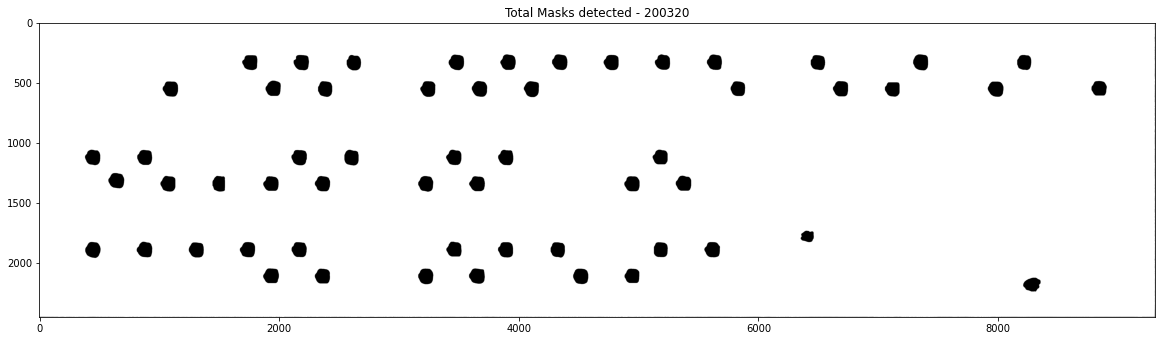

[[255 255 255 ... 255 114 130]
 [255 255 255 ... 255 142 154]
 [255 255 255 ... 255 161 168]
 ...
 [255 255 255 ... 255  55  50]
 [ 51  50  55 ...  55  55  51]
 [ 52  52  55 ...  52  53  53]]


In [13]:
        a.detected_masks = cv2.bitwise_not(a.detected_masks)
        plt.rcParams["figure.figsize"] = (20,8)
        plt.imshow(a.detected_masks,cmap='gray')
        plt.title('Total Masks detected - {}'.format(date))
        plt.show()

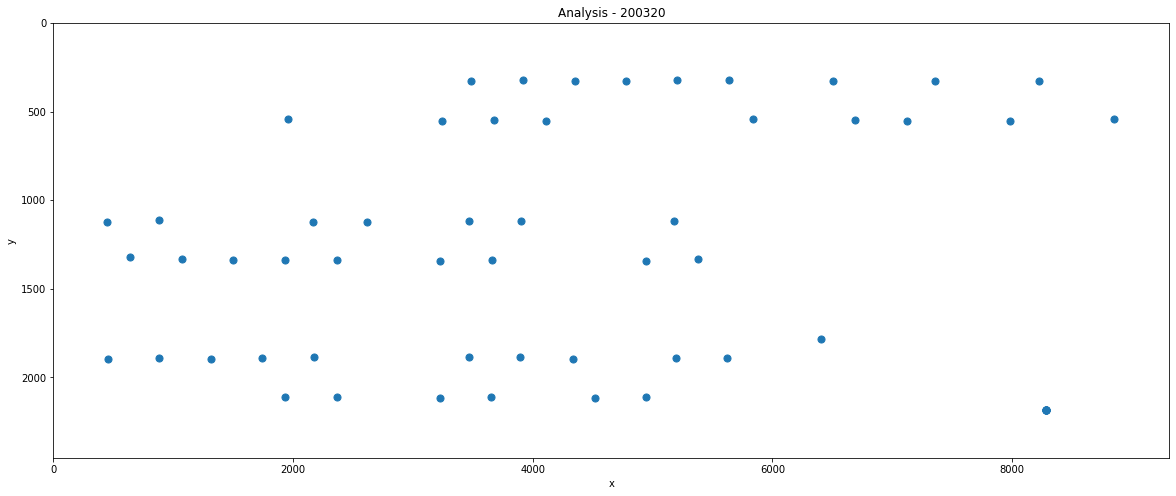

In [39]:
        plants_cor = np.append(plants_cor, pts, axis=0)
        plants_cor = plants_cor[1:, :]
        coordinates = plants_cor.tolist()[:-1]
        x = []
        y = []
        for i in coordinates:
            x.append(i[0])
            y.append(i[1])
        norm_area = [(i - min(area)) / (max(area) - min(area)) for i in area]
        norm_area = [int(i*200)+10 for i in norm_area]
        plt.rcParams["figure.figsize"] = (20,8)
        plt.scatter(x, y, s=50)
        plt.title('Analysis - {}'.format(date))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(0, width)
        plt.ylim(height, 0)
        plt.show()

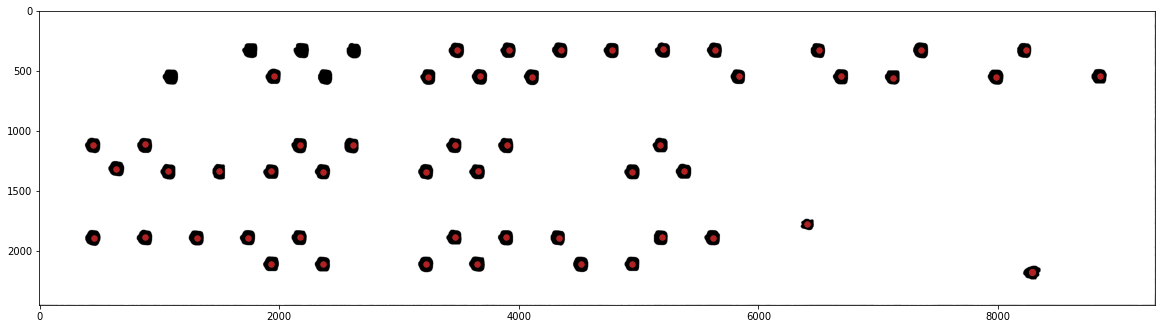

In [42]:
bkgd = a.detected_masks
fig, ax = plt.subplots()
# x = range(300)
ax.imshow(bkgd,cmap='gray')
ax.scatter(x, y, s=30, color='firebrick')

In [0]:
#https://www.kaggle.com/whizzkid/crop-images-using-bounding-box